In [10]:
import optuna
from sklearn.base import clone
import numpy as np
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

None


Статистики для LoanApproved:
Минимум: 0.00
Максимум: 1.00
Среднее: 0.51
Медиана: 1.00
Стандартное отклонение: 0.50


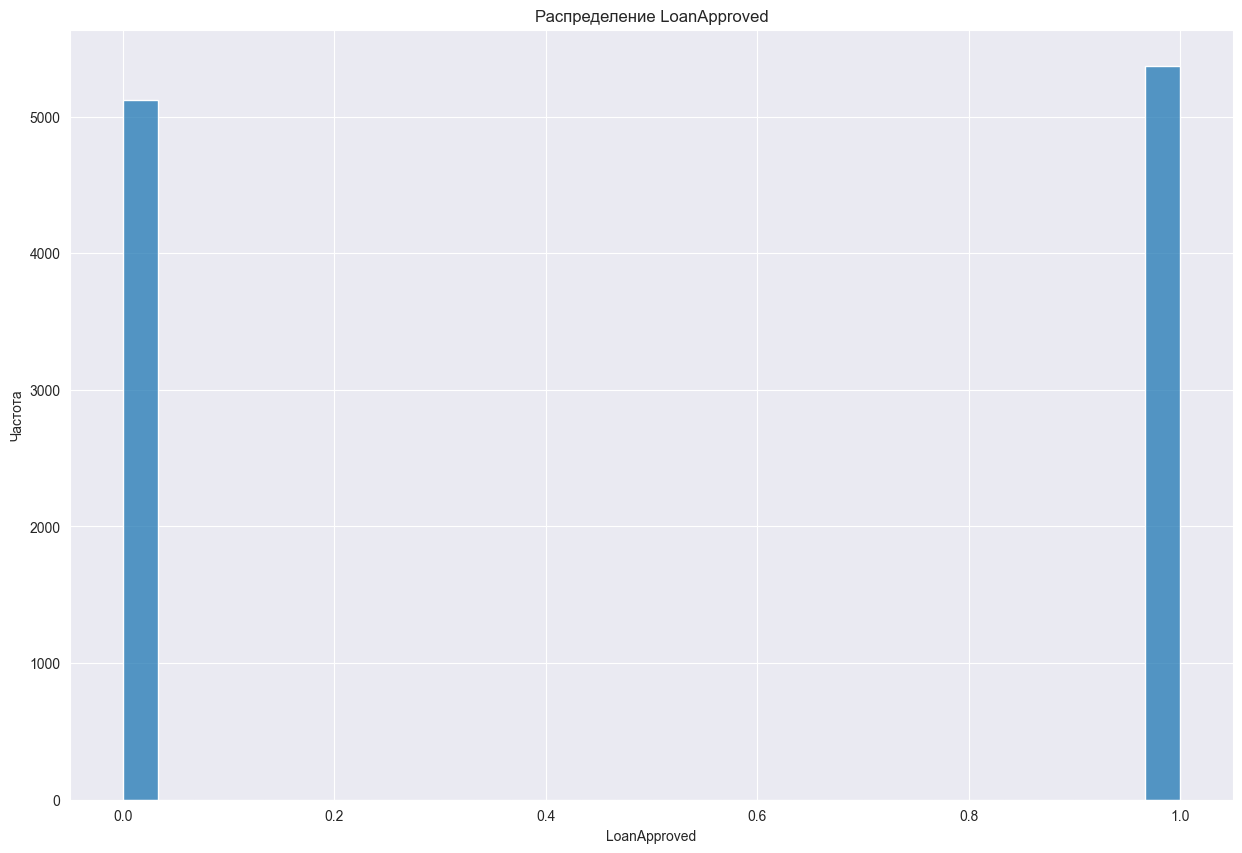

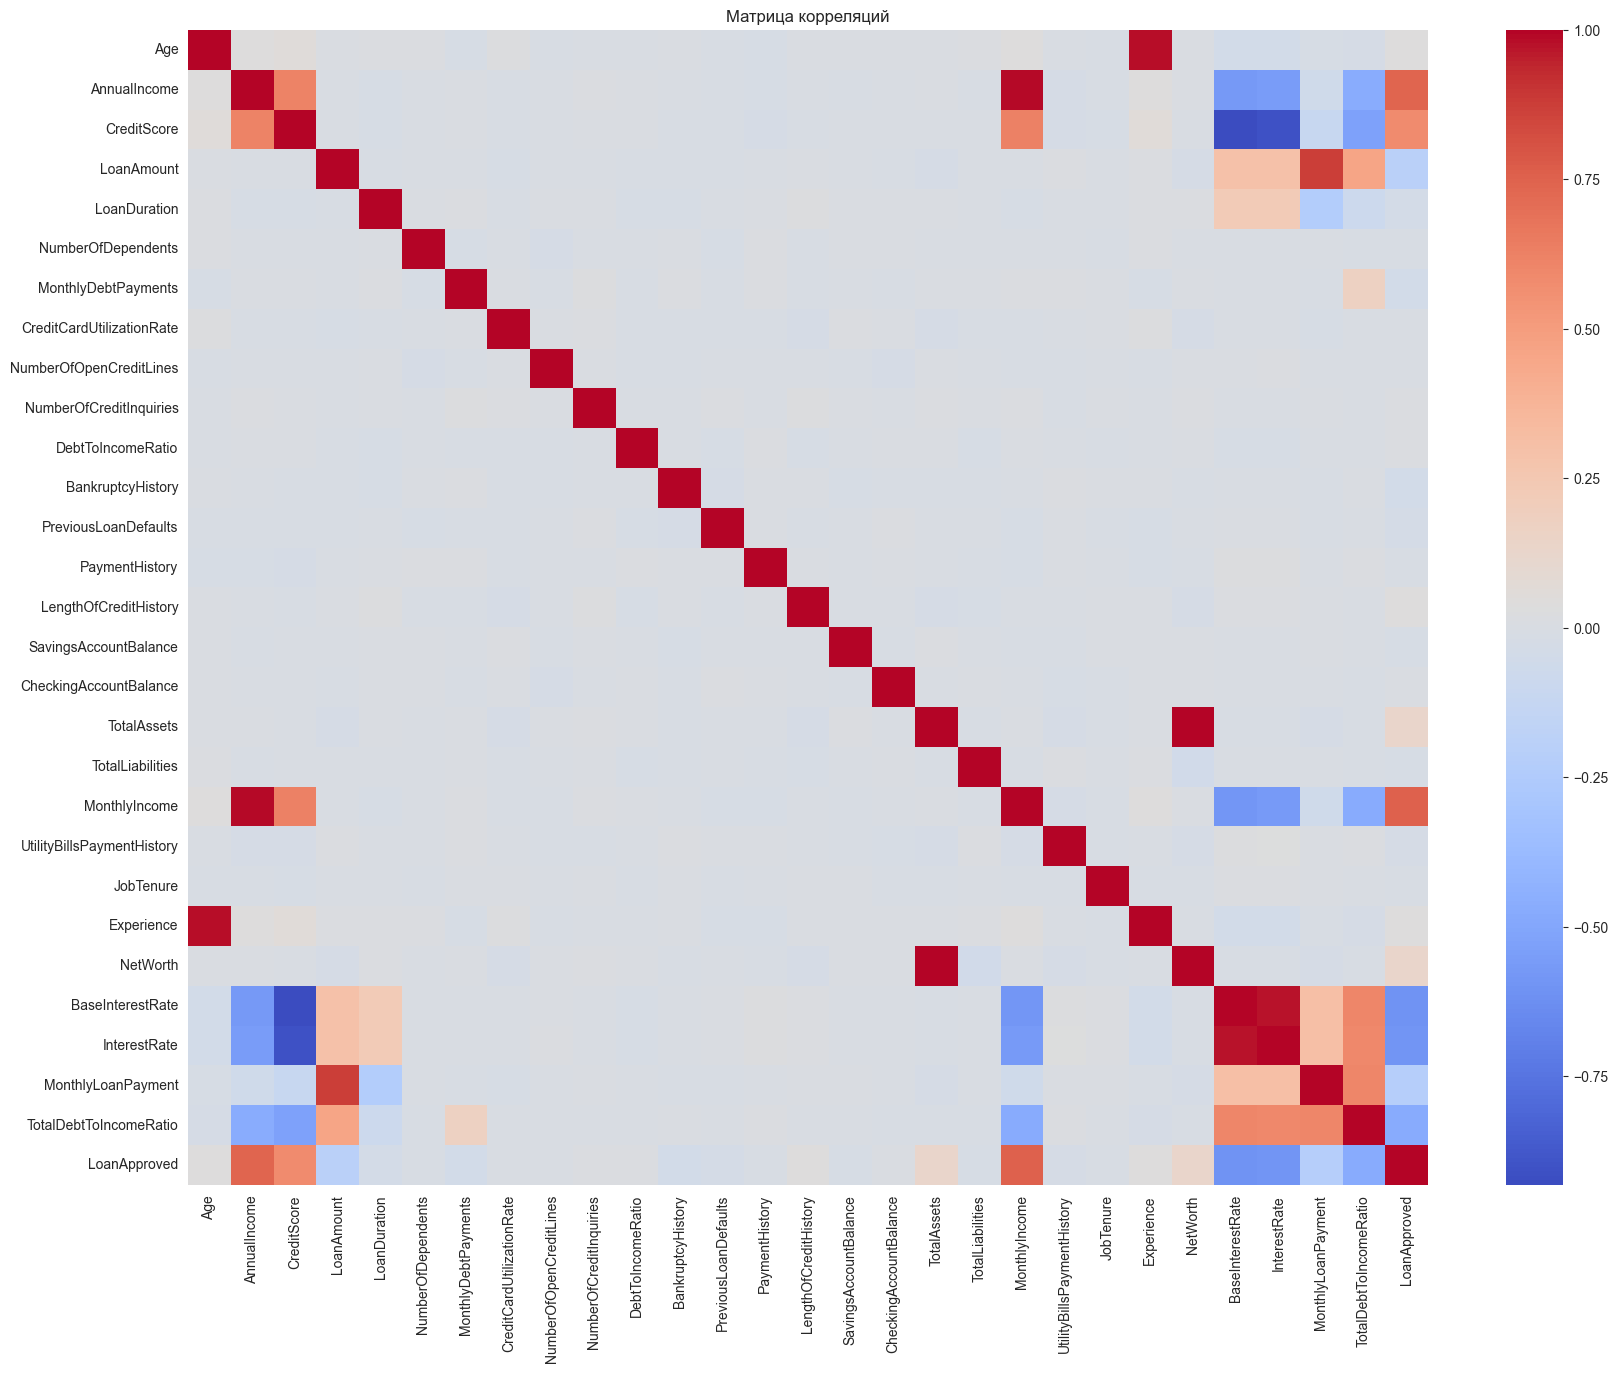

Топ-10 признаков по корреляции с LoanApproved (положительные):


LoanApproved               1.000000
MonthlyIncome              0.754853
AnnualIncome               0.743034
CreditScore                0.581812
NetWorth                   0.129624
TotalAssets                0.129204
LengthOfCreditHistory      0.038509
Experience                 0.036699
Age                        0.036580
DebtToIncomeRatio          0.014922
NumberOfCreditInquiries    0.012520
Name: LoanApproved, dtype: float64


Топ-10 признаков по корреляции с LoanApproved (отрицательные):


UtilityBillsPaymentHistory   -0.020812
PreviousLoanDefaults         -0.029994
LoanDuration                 -0.039908
BankruptcyHistory            -0.042160
MonthlyDebtPayments          -0.044257
LoanAmount                   -0.195607
MonthlyLoanPayment           -0.217369
TotalDebtToIncomeRatio       -0.476222
InterestRate                 -0.599180
BaseInterestRate             -0.605164
Name: LoanApproved, dtype: float64


Корреляция признаков с LoanApproved:


LoanApproved        1.000000
MonthlyIncome       0.754853
AnnualIncome        0.743034
CreditScore         0.581812
InterestRate       -0.599180
BaseInterestRate   -0.605164
Name: LoanApproved, dtype: float64

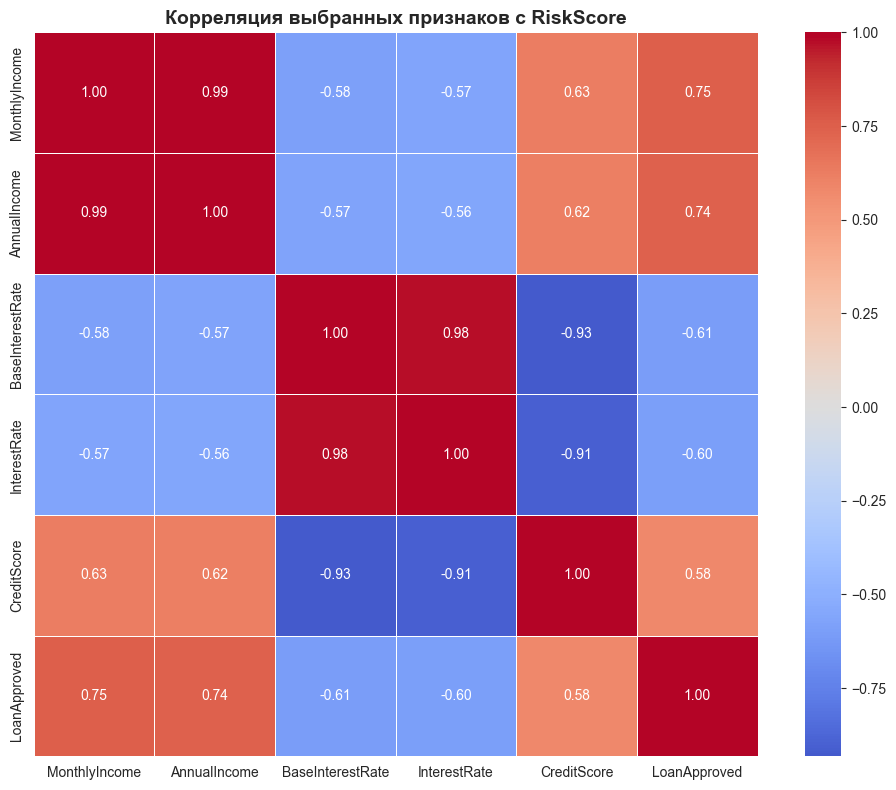

In [11]:
train_df = pd.read_csv('train_c.csv')
test_df = pd.read_csv('test_c.csv')

display(train_df.head())
display(train_df.info())
print(f"\nСтатистики для LoanApproved:")
print(f"Минимум: {train_df['LoanApproved'].min():.2f}")
print(f"Максимум: {train_df['LoanApproved'].max():.2f}")
print(f"Среднее: {train_df['LoanApproved'].mean():.2f}")
print(f"Медиана: {train_df['LoanApproved'].median():.2f}")
print(f"Стандартное отклонение: {train_df['LoanApproved'].std():.2f}")

plt.figure(figsize=(15, 10))
sns.histplot(train_df['LoanApproved'],  bins=30)

plt.title('Распределение LoanApproved')
plt.xlabel('LoanApproved')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

only_numerical_columns = train_df.select_dtypes(include=np.number)
correlation_matrix = only_numerical_columns.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

print("Топ-10 признаков по корреляции с LoanApproved (положительные):")
cor_numer = train_df.select_dtypes(include=np.number).corr()['LoanApproved'].sort_values(ascending=False)
display(cor_numer.head(11)) 
print("\nТоп-10 признаков по корреляции с LoanApproved (отрицательные):")
display(cor_numer.tail(10))   

selected_features = [
    'MonthlyIncome',
    'AnnualIncome',
    'BaseInterestRate',
    'InterestRate',
    'CreditScore'
]

corr_features = selected_features + ['LoanApproved']
corr_matrix = train_df[corr_features].corr()

print("\nКорреляция признаков с LoanApproved:")
display(corr_matrix['LoanApproved'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            fmt='.2f')
plt.title('Корреляция выбранных признаков с RiskScore', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_data(df, label_encoders=None):
    df_processed = df.copy()

    columns_to_drop = ['ID']
    existing_columns = [col for col in columns_to_drop if col in df_processed.columns]
    df_processed = df_processed.drop(columns=existing_columns, errors='ignore')

    numeric_columns = df_processed.select_dtypes(include=np.number).columns
    categorical_columns = df_processed.select_dtypes(include='object').columns

    for column in numeric_columns:
        median_value = df_processed[column].median()
        df_processed[column] = df_processed[column].fillna(median_value)

    for column in categorical_columns:
        mode_value = df_processed[column].mode().iloc[0]
        df_processed[column] = df_processed[column].fillna(mode_value)

    if label_encoders is None:
        label_encoders = {}
        for column in categorical_columns:
            encoder = LabelEncoder()
            df_processed[column] = encoder.fit_transform(df_processed[column])
            label_encoders[column] = encoder
    else:
        for column in categorical_columns:
            encoder = label_encoders.get(column)
            if encoder is not None:
                df_processed[column] = df_processed[column].map(
                    lambda value: value if value in encoder.classes_ else encoder.classes_[0]
                )
                df_processed[column] = encoder.transform(df_processed[column])


    return df_processed, label_encoders


df_train_proc, encoders = preprocess_data(train_df)
df_test_proc, _ = preprocess_data(test_df, label_encoders=encoders)

X = df_train_proc.drop('LoanApproved', axis=1)
y = df_train_proc['LoanApproved']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

display(X_train.head())

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
3051,-1.298988,-0.340450,1.504055,0.853391,-0.410549,-0.216440,0.986319,-1.109094,1.286273,-0.543020,...,0.143584,-1.374533,-0.360953,-0.696595,-0.325280,-0.304342,-0.976731,-1.058346,-0.452391,-0.538775
1344,1.026024,-0.340450,1.504055,1.002835,-0.084867,-0.718021,0.986319,1.050102,1.286273,0.430211,...,0.431043,-0.908860,-0.360953,0.825345,-0.234876,-0.056054,-1.130878,-1.041635,-0.143340,-0.498901
9627,-1.516644,1.601155,-1.010642,-2.284942,0.292967,-0.718021,-0.333044,0.330370,1.286273,-0.884798,...,0.884992,-0.443186,-0.360953,0.825345,1.573201,-0.312734,2.035218,2.160673,0.550455,1.152299
5471,0.346642,0.895117,-0.305732,-0.103053,0.212340,-0.216440,0.986319,-0.389362,0.508679,-0.272099,...,-0.896232,-0.908860,-0.360953,0.825345,0.940374,-0.309111,0.095213,0.051791,0.006067,-0.360523
4745,0.006950,-0.075686,-0.507323,1.002835,-0.500240,-0.718021,0.986319,-1.109094,1.286273,-0.593037,...,0.891728,0.953834,3.905805,-0.696595,-0.325280,0.190766,-1.253065,-1.189436,-0.421725,-0.429544


In [13]:
class CustomBagging:
    def __init__(self, base_estimator=None, n_estimators=10, random_state=42):
        self.base_estimator = base_estimator if base_estimator else DecisionTreeClassifier()
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.models = []
        
    def fit(self, X, y):
        self.models = []
        rng = np.random.default_rng(self.random_state)
        X = np.array(X)
        y = np.array(y)
        n_samples = X.shape[0]
        
        for i in range(self.n_estimators):
            indices = rng.choice(n_samples, size=n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            
            model = clone(self.base_estimator) 
            model.fit(X_sample, y_sample)
            self.models.append(model)
        return self

    def predict_proba(self, X):
        probas = np.zeros((X.shape[0], 2))
        for model in self.models:
            probas += model.predict_proba(X)
        return probas / self.n_estimators

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return mode(predictions, axis=0, keepdims=False)[0]

In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

custom_bagging = CustomBagging(n_estimators=50, base_estimator=DecisionTreeClassifier())
custom_bagging.fit(X_train, y_train)

y_pred_custom = custom_bagging.predict(X_val)

accuracy_custom = accuracy_score(y_val, y_pred_custom)
f1_custom = f1_score(y_val, y_pred_custom)
roc_auc_custom = roc_auc_score(y_val, y_pred_custom)

sklearn_bagging_clf = BaggingClassifier(n_estimators=50, estimator=DecisionTreeClassifier(), random_state=42)
sklearn_bagging_clf.fit(X_train, y_train)

y_pred_sklearn = sklearn_bagging_clf.predict(X_val)

accuracy_sklearn = accuracy_score(y_val, y_pred_sklearn)
f1_sklearn = f1_score(y_val, y_pred_sklearn)
roc_auc_sklearn = roc_auc_score(y_val, y_pred_sklearn)

metrics_data = {
    'Metric': ['Accuracy', 'F1-score', 'ROC AUC'],
    'Custom Bagging': [accuracy_custom, f1_custom, roc_auc_custom],
    'Scikit-learn Bagging Classifier': [accuracy_sklearn, f1_sklearn, roc_auc_sklearn]
}

performance_comparison_df = pd.DataFrame(metrics_data)
print("Сравнение Bagging Classifier (своя реализация vs sklearn):")
display(performance_comparison_df)      

Сравнение Bagging Classifier (своя реализация vs sklearn):


,Metric,Custom Bagging,Scikit-learn Bagging Classifier
0,Accuracy,0.924682,0.926044
1,F1-score,0.930076,0.931426
2,ROC AUC,0.923851,0.925122


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier

class MyGradientBoostingClassifier:

    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.initial_prediction = None
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
       
        unique_classes = np.unique(y)
       
        y_binary = np.where(y == unique_classes[1], 1, 0)
      
        pos_frac = np.mean(y_binary)
        if pos_frac == 0:
            self.initial_prediction = -10 
        elif pos_frac == 1:
            self.initial_prediction = 10   
        else:
            self.initial_prediction = np.log(pos_frac / (1 - pos_frac))

        y_pred_logits = np.full(len(y_binary), self.initial_prediction)
        self.models = []
        
        for i in range(self.n_estimators):
            probs = 1 / (1 + np.exp(-y_pred_logits))
            residuals = y_binary - probs
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                random_state=self.random_state + i if self.random_state else None
            )
            tree.fit(X, residuals)
            self.models.append(tree)
    
            update = tree.predict(X)
            y_pred_logits += self.learning_rate * update
        
        return self
    
    def predict(self, X):
        X = np.array(X)
        y_pred_logits = np.full(X.shape[0], self.initial_prediction)
        
        for tree in self.models:
            y_pred_logits += self.learning_rate * tree.predict(X)
            
        probs = 1 / (1 + np.exp(-y_pred_logits))
        return (probs > 0.5).astype(int)
    
gb_clf = MyGradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_val)

accuracy_gb = accuracy_score(y_val, y_pred_gb)
f1_gb = f1_score(y_val, y_pred_gb)
roc_auc_gb = roc_auc_score(y_val, y_pred_gb)

sklearn_gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
sklearn_gb_clf.fit(X_train, y_train)
y_pred_sklearn_gb = sklearn_gb_clf.predict(X_val)

accuracy_sklearn_gb = accuracy_score(y_val, y_pred_sklearn_gb)
f1_sklearn_gb = f1_score(y_val, y_pred_sklearn_gb)
roc_auc_sklearn_gb = roc_auc_score(y_val, y_pred_sklearn_gb)

metrics_data_gb = {
    'Metric': ['Accuracy', 'F1-score', 'ROC AUC'],
    'Custom GBC': [accuracy_gb, f1_gb, roc_auc_gb],
    'Scikit-learn GBC': [accuracy_sklearn_gb, f1_sklearn_gb, roc_auc_sklearn_gb]
}

performance_comparison_gb_df = pd.DataFrame(metrics_data_gb)

print("Сравнение градиентного бустинга (своя реализация vs sklearn):")
display(performance_comparison_gb_df)    

Сравнение градиентного бустинга (своя реализация vs sklearn):


,Metric,Custom GBC,Scikit-learn GBC
0,Accuracy,0.920145,0.928312
1,F1-score,0.926174,0.933446
2,ROC AUC,0.918968,0.927499


In [18]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import time

results = []

print("\n" + "=" * 60)
print("Training LightGBM...")
start_time = time.time()

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)
y_pred_proba_lgb = lgb_model.predict_proba(X_val)[:, 1]

accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
f1_lgb = f1_score(y_val, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_val, y_pred_proba_lgb)
lgb_time = time.time() - start_time

results.append({
    'Algorithm': 'LightGBM',
    'Accuracy': accuracy_lgb,
    'F1-Score': f1_lgb,
    'ROC-AUC': roc_auc_lgb,
    'Training Time (s)': lgb_time
})

print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"F1-Score: {f1_lgb:.4f}")
print(f"ROC-AUC: {roc_auc_lgb:.4f}")
print(f"Training time: {lgb_time:.2f} seconds")


print("\n" + "=" * 60)
print("Training XGBoost...")
start_time = time.time()

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_val)
y_pred_proba_xgb = xgb_clf.predict_proba(X_val)[:, 1]

accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb)
xgb_time = time.time() - start_time

results.append({
    'Algorithm': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'F1-Score': f1_xgb,
    'ROC-AUC': roc_auc_xgb,
    'Training Time (s)': xgb_time
})

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print(f"Training time: {xgb_time:.2f} seconds")


print("\n" + "=" * 60)
print("Training CatBoost...")
start_time = time.time()

catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_val)
y_pred_proba_catboost = catboost_model.predict_proba(X_val)[:, 1]

accuracy_catboost = accuracy_score(y_val, y_pred_catboost)
f1_catboost = f1_score(y_val, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_val, y_pred_proba_catboost)
catboost_time = time.time() - start_time

results.append({
    'Algorithm': 'CatBoost',
    'Accuracy': accuracy_catboost,
    'F1-Score': f1_catboost,
    'ROC-AUC': roc_auc_catboost,
    'Training Time (s)': catboost_time
})

print(f"Accuracy: {accuracy_catboost:.4f}")
print(f"F1-Score: {f1_catboost:.4f}")
print(f"ROC-AUC: {roc_auc_catboost:.4f}")
print(f"Training time: {catboost_time:.2f} seconds")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False)

display(results_df)


Training LightGBM...
[LightGBM] [Info] Number of positive: 4717, number of negative: 4096
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4833
[LightGBM] [Info] Number of data points in the train set: 8813, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535232 -> initscore=0.141162
[LightGBM] [Info] Start training from score 0.141162
Accuracy: 0.9324
F1-Score: 0.9372
ROC-AUC: 0.9836
Training time: 0.14 seconds

Training XGBoost...
Accuracy: 0.9297
F1-Score: 0.9343
ROC-AUC: 0.9826
Training time: 0.22 seconds

Training CatBoost...
Accuracy: 0.9324
F1-Score: 0.9372
ROC-AUC: 0.9844
Training time: 7.15 seconds


,Algorithm,Accuracy,F1-Score,ROC-AUC,Training Time (s)
2,CatBoost,0.932396,0.937210,0.984358,7.152154
0,LightGBM,0.932396,0.937157,0.983619,0.142175
1,XGBoost,0.929673,0.934350,0.982561,0.216951


In [19]:
def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'depth': trial.suggest_int('depth', 4, 10), 
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 10.0),
        'od_type': 'Iter', 
        'od_wait': trial.suggest_int('od_wait', 10, 50),
        'verbose': False,
        'random_state': 42,
        'eval_metric': 'AUC' 
    }
    
    model = CatBoostClassifier(**param)
    
    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        use_best_model=True, 
        early_stopping_rounds=50,
        verbose=False
    )
    
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    return roc_auc

study = optuna.create_study(
    direction='maximize', 
    study_name='catboost_hyperopt'
)

print("Начинаем поиск оптимальных гиперпараметров...")
study.optimize(objective_catboost, n_trials=50)  

print("ОПТИМИЗАЦИЯ ЗАВЕРШЕНА")
print("="*60)
print(f"Лучшее значение ROC-AUC: {study.best_value:.4f}")
print(f"Лучшие гиперпараметры:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2025-12-12 19:56:03,079] A new study created in memory with name: catboost_hyperopt


Начинаем поиск оптимальных гиперпараметров...


[I 2025-12-12 19:56:04,765] Trial 0 finished with value: 0.9807973053495762 and parameters: {'iterations': 326, 'depth': 5, 'learning_rate': 0.012625718204934635, 'l2_leaf_reg': 0.0028747669305725482, 'random_strength': 0.0015766274184481172, 'bagging_temperature': 6.854050009381957, 'od_wait': 21}. Best is trial 0 with value: 0.9807973053495762.
[I 2025-12-12 19:56:07,027] Trial 1 finished with value: 0.9811391022245762 and parameters: {'iterations': 451, 'depth': 4, 'learning_rate': 0.02033453037859712, 'l2_leaf_reg': 0.19514366261689328, 'random_strength': 4.907973047005611, 'bagging_temperature': 3.320777942803378, 'od_wait': 23}. Best is trial 1 with value: 0.9811391022245762.
[I 2025-12-12 19:56:07,908] Trial 2 finished with value: 0.9820891816737289 and parameters: {'iterations': 279, 'depth': 6, 'learning_rate': 0.10194144076001001, 'l2_leaf_reg': 0.004575425257199161, 'random_strength': 0.012945786537787503, 'bagging_temperature': 9.50698151183639, 'od_wait': 37}. Best is tria

ОПТИМИЗАЦИЯ ЗАВЕРШЕНА
Лучшее значение ROC-AUC: 0.9850
Лучшие гиперпараметры:
  iterations: 313
  depth: 8
  learning_rate: 0.10756546958113526
  l2_leaf_reg: 5.948258723153153
  random_strength: 4.118984012199856
  bagging_temperature: 8.207151783513813
  od_wait: 21


In [25]:
best_params = study.best_params
best_params['random_seed'] = 42
best_params['verbose'] = 0
best_params['eval_metric'] = 'AUC'

FiNaL = CatBoostClassifier(**best_params)
FiNaL.fit(X_train, y_train)

y_pred_FiNaL = FiNaL.predict(X_val)
y_pred_proba_FiNaL = FiNaL.predict_proba(X_val)[:, 1]

roc_auc_FiNaL = roc_auc_score(y_val, y_pred_proba_FiNaL)

print(f"ROC AUC: {roc_auc_FiNaL:.4f}")

ROC AUC: 0.9849


In [28]:
from sklearn.metrics import precision_score, recall_score


def my_accuracy(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Длины y_true и y_pred должны совпадать")
    
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    
    return correct / total


def my_precision(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    if len(y_true) != len(y_pred):
        raise ValueError("Длины y_true и y_pred должны совпадать")
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    
    if tp + fp == 0:
        return 0.0
    
    return tp / (tp + fp)


def my_recall(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    if len(y_true) != len(y_pred):
        raise ValueError("Длины y_true и y_pred должны совпадать")
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    if tp + fn == 0:
        return 0.0
    
    return tp / (tp + fn)


def my_f1_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    precision = my_precision(y_true, y_pred)
    recall = my_recall(y_true, y_pred)
    
    if precision + recall == 0:
        return 0.0
    
    return 2 * (precision * recall) / (precision + recall)


custom_acc = my_accuracy(y_val, y_pred_FiNaL)
sklearn_acc = accuracy_score(y_val, y_pred_FiNaL)

custom_prec = my_precision(y_val, y_pred_FiNaL)
sklearn_prec = precision_score(y_val, y_pred_FiNaL)

custom_rec = my_recall(y_val, y_pred_FiNaL)
sklearn_rec = recall_score(y_val, y_pred_FiNaL)

custom_f1 = my_f1_score(y_val, y_pred_FiNaL)
sklearn_f1 = f1_score(y_val, y_pred_FiNaL)

data = {
    'Metrics': ['accuracy', 'precision', 'recall', 'f1_score'],
    'my_metrics': [custom_acc, custom_prec, custom_rec, custom_f1],
    'sklearn_metrics': [sklearn_acc, sklearn_prec, sklearn_prec, sklearn_f1]
}

display(pd.DataFrame(data))

,Metrics,my_metrics,sklearn_metrics
0,accuracy,0.935118,0.935118
1,precision,0.936816,0.936816
2,recall,0.942373,0.936816
3,f1_score,0.939586,0.939586


In [29]:
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_scaled, y)

df_test_proc, _ = preprocess_data(test_df, label_encoders=encoders)
X_test = pd.DataFrame(scaler.transform(df_test_proc), columns=df_test_proc.columns)

test_pred_proba = final_model.predict_proba(X_test)[:, 1]

submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'LoanApproved': test_pred_proba
})

submission_df.to_csv('submission.csv', index=False)

display(submission_df.head())

,ID,LoanApproved
0,0,0.999052
1,1,0.004841
2,2,0.999631
3,3,0.998933
4,4,0.994520
